Size: 1000, Bubble Sort Time: 0.03277 sec, Merge Sort Time: 0.00105 sec
Size: 5000, Bubble Sort Time: 0.56229 sec, Merge Sort Time: 0.00494 sec
Size: 10000, Bubble Sort Time: 2.25117 sec, Merge Sort Time: 0.01029 sec
Size: 50000, Bubble Sort Time: 57.47843 sec, Merge Sort Time: 0.06292 sec
Size: 100000, Bubble Sort Time: 239.97949 sec, Merge Sort Time: 0.13585 sec


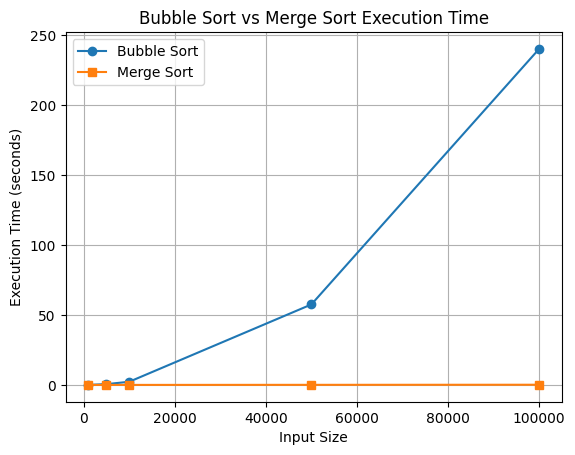

In [2]:
import time
import random
import matplotlib.pyplot as plt


def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break


def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    return time.time() - start_time


sizes = [1000, 5000, 10000, 50000, 100000]
bubble_sort_times = []
merge_sort_times = []

for size in sizes:
    arr = [random.randint(0, 100000) for _ in range(size)]
    arr_copy = arr[:]

    bubble_time = measure_time(bubble_sort, arr)
    merge_time = measure_time(merge_sort, arr_copy)

    bubble_sort_times.append(bubble_time)
    merge_sort_times.append(merge_time)

    print(
        f"Size: {size}, Bubble Sort Time: {bubble_time:.5f} sec, Merge Sort Time: {merge_time:.5f} sec")

plt.plot(sizes, bubble_sort_times, marker='o', label='Bubble Sort')
plt.plot(sizes, merge_sort_times, marker='s', label='Merge Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Bubble Sort vs Merge Sort Execution Time')
plt.legend()
plt.grid()
plt.show()


n: 20, Recursive Fibonacci: 6765, Recursive Time: 0.00110 sec
n: 20, Iterative Fibonacci: 6765, Iterative Time: 0.00000 sec

n: 30, Recursive Fibonacci: 832040, Recursive Time: 0.07836 sec
n: 30, Iterative Fibonacci: 832040, Iterative Time: 0.00000 sec

n: 40, Recursive Fibonacci: 102334155, Recursive Time: 9.55852 sec
n: 40, Iterative Fibonacci: 102334155, Iterative Time: 0.00000 sec

n: 45, Recursive Fibonacci: 1134903170, Recursive Time: 105.33872 sec
n: 45, Iterative Fibonacci: 1134903170, Iterative Time: 0.00001 sec



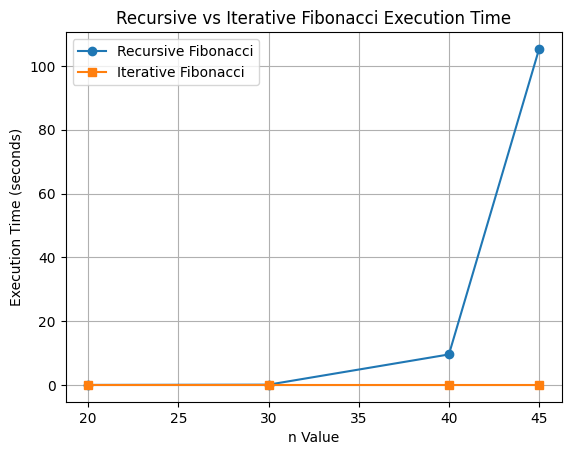

In [3]:
import time
import matplotlib.pyplot as plt

def recursive_fibonacci(n):
    if n <= 0:
        return 0
    if n == 1 or n == 2:
        return 1
    return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)

def iterative_fibonacci(n):
    if n <= 0:
        return 0
    if n == 1 or n == 2:
        return 1
    a = 1
    b = 1
    for _ in range(3, n + 1):
        c = a+b
        b = a
        a = c
    return c

def measure_time(func, n):
    start_time = time.time()
    result = func(n)  # Compute the Fibonacci number
    exec_time = time.time() - start_time
    return exec_time, result

n_values = [20, 30, 40, 45]
recursive_times = []
iterative_times = []
recursive_results = []
iterative_results = []

for n in n_values:
    rec_time, rec_result = measure_time(recursive_fibonacci, n)
    itr_time, itr_result = measure_time(iterative_fibonacci, n)

    recursive_times.append(rec_time)
    iterative_times.append(itr_time)
    recursive_results.append(rec_result)
    iterative_results.append(itr_result)

    print(f"n: {n}, Recursive Fibonacci: {rec_result}, Recursive Time: {rec_time:.5f} sec")
    print(f"n: {n}, Iterative Fibonacci: {itr_result}, Iterative Time: {itr_time:.5f} sec\n")

plt.plot(n_values, recursive_times, marker='o', label='Recursive Fibonacci')
plt.plot(n_values, iterative_times, marker='s', label='Iterative Fibonacci')
plt.xlabel('n Value')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive vs Iterative Fibonacci Execution Time')
plt.legend()
plt.grid()
plt.show()


Scenario with 5 items:
  Maximum Value: 270
  Selected Items (weight, value): [(10, 60), (20, 100), (5, 30), (15, 80)]
  Total Weight Used: 50
  Execution Time: 0.00003 sec

Scenario with 6 items:
  Maximum Value: 310
  Selected Items (weight, value): [(12, 70), (22, 110), (7, 40), (17, 90)]
  Total Weight Used: 58
  Execution Time: 0.00006 sec

Scenario with 7 items:
  Maximum Value: 360
  Selected Items (weight, value): [(35, 120), (55, 240)]
  Total Weight Used: 90
  Execution Time: 0.00010 sec

Scenario with 8 items:
  Maximum Value: 300
  Selected Items (weight, value): [(40, 120), (60, 180)]
  Total Weight Used: 100
  Execution Time: 0.00026 sec

Scenario with 9 items:
  Maximum Value: 420
  Selected Items (weight, value): [(45, 170), (65, 250)]
  Total Weight Used: 110
  Execution Time: 0.00045 sec

Scenario with 10 items:
  Maximum Value: 430
  Selected Items (weight, value): [(48, 175), (68, 255)]
  Total Weight Used: 116
  Execution Time: 0.00085 sec



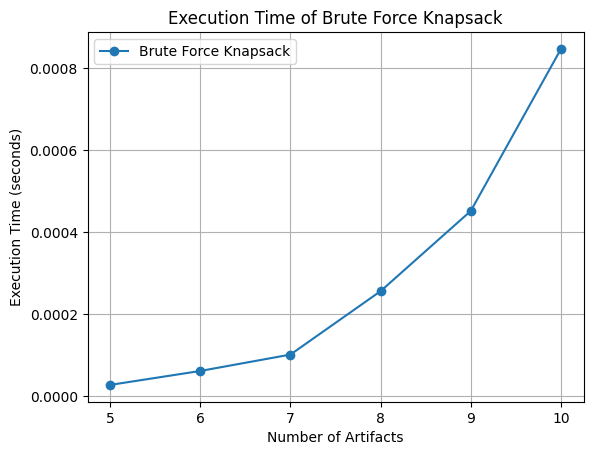

In [4]:
import time
import itertools
import matplotlib.pyplot as plt


def brute_force_knapsack(weights, values, W):
    n = len(weights)
    max_value = 0
    best_combination = []

    for combination in itertools.product([0, 1], repeat=n):
        total_weight = sum(weights[i] for i in range(n) if combination[i] == 1)
        total_value = sum(values[i] for i in range(n) if combination[i] == 1)

        if total_weight <= W and total_value > max_value:
            max_value = total_value
            best_combination = combination

    selected_items = [(weights[i], values[i]) for i in range(n) if best_combination[i] == 1]
    total_selected_weight = sum(item[0] for item in selected_items)

    return max_value, selected_items, total_selected_weight


def measure_time(func, weights, values, W):
    start_time = time.time()
    max_value, selected_items, total_weight = func(weights, values, W)
    return time.time() - start_time, max_value, selected_items, total_weight


def read_input(filename):
    scenarios = []
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]

    i = 0
    while i < len(lines):
        W = int(lines[i])
        i += 1
        weights, values = [], []
        while i < len(lines) and ' ' in lines[i]:
            w, v = map(int, lines[i].split())
            weights.append(w)
            values.append(v)
            i += 1
        scenarios.append((W, weights, values))

    return scenarios


# Read input from file
input_file = "q3input.txt"
scenarios = read_input(input_file)

execution_times = []
n_values = []

for W, weights, values in scenarios:
    n = len(weights)
    exec_time, max_value, selected_items, total_weight = measure_time(brute_force_knapsack, weights, values, W)
    execution_times.append(exec_time)
    n_values.append(n)
    print(f"Scenario with {n} items:")
    print(f"  Maximum Value: {max_value}")
    print(f"  Selected Items (weight, value): {selected_items}")
    print(f"  Total Weight Used: {total_weight}")
    print(f"  Execution Time: {exec_time:.5f} sec\n")

plt.plot(n_values, execution_times, marker='o', label='Brute Force Knapsack')
plt.xlabel('Number of Artifacts')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Brute Force Knapsack')
plt.legend()
plt.grid()
plt.show()

Scenario 1 with 4 locations:
  Shortest Distance: 80
  Best Route: [0, 1, 3, 2]
  Execution Time: 0.00001 sec

Scenario 2 with 5 locations:
  Shortest Distance: 63
  Best Route: [0, 1, 4, 3, 2]
  Execution Time: 0.00001 sec

Scenario 3 with 6 locations:
  Shortest Distance: 75
  Best Route: [0, 2, 3, 5, 1, 4]
  Execution Time: 0.00004 sec

Scenario 4 with 7 locations:
  Shortest Distance: 125
  Best Route: [0, 3, 2, 4, 1, 6, 5]
  Execution Time: 0.00024 sec

Scenario 5 with 8 locations:
  Shortest Distance: 171
  Best Route: [0, 4, 1, 3, 2, 7, 5, 6]
  Execution Time: 0.00173 sec

Scenario 6 with 9 locations:
  Shortest Distance: 201
  Best Route: [0, 1, 4, 7, 3, 6, 5, 8, 2]
  Execution Time: 0.01498 sec

Scenario 7 with 10 locations:
  Shortest Distance: 262
  Best Route: [0, 3, 8, 9, 5, 7, 6, 1, 2, 4]
  Execution Time: 0.15114 sec



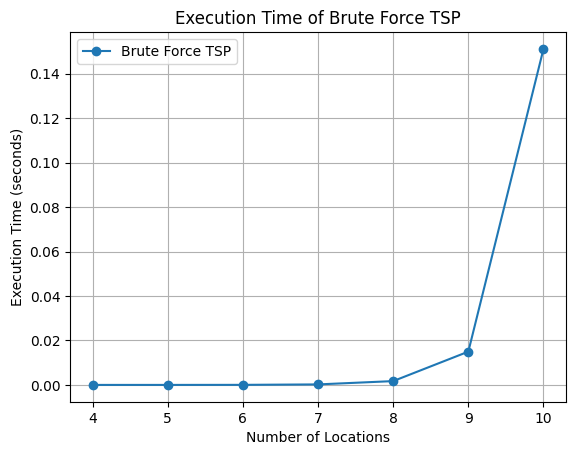

In [5]:
import time
import itertools
import matplotlib.pyplot as plt


def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    total_distance += distance_matrix[route[-1]][route[0]]  # Return to starting point
    return total_distance


def brute_force_tsp(distance_matrix):
    n = len(distance_matrix)
    locations = list(range(n))
    min_distance = float('inf')
    best_route = None

    for perm in itertools.permutations(locations[1:]):  # Fix warehouse (index 0) as the start
        route = [0] + list(perm)
        total_distance = calculate_total_distance(route, distance_matrix)
        if total_distance < min_distance:
            min_distance = total_distance
            best_route = route

    return min_distance, best_route


def measure_time(func, distance_matrix):
    start_time = time.time()
    min_distance, best_route = func(distance_matrix)
    exec_time = time.time() - start_time
    return exec_time, min_distance, best_route


def read_input(filename):
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]

    scenarios = []
    i = 0
    while i < len(lines):
        n = int(lines[i])  # Number of locations
        i += 1
        matrix = []
        for _ in range(n):
            matrix.append(list(map(int, lines[i].split())))
            i += 1
        scenarios.append(matrix)

    return scenarios


# Read input from file
input_file = "q4input.txt"
distance_matrices = read_input(input_file)

execution_times = []
n_values = []

for i, distance_matrix in enumerate(distance_matrices):
    n = len(distance_matrix)
    exec_time, min_distance, best_route = measure_time(brute_force_tsp, distance_matrix)
    execution_times.append(exec_time)
    n_values.append(n)
    print(f"Scenario {i + 1} with {n} locations:")
    print(f"  Shortest Distance: {min_distance}")
    print(f"  Best Route: {best_route}")
    print(f"  Execution Time: {exec_time:.5f} sec\n")

plt.plot(n_values, execution_times, marker='o', label='Brute Force TSP')
plt.xlabel('Number of Locations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Brute Force TSP')
plt.legend()
plt.grid()
plt.show()


In [ ]:
    if target is None:
        return -1
    low = 0
    high = len(arr) - 1
    result = -1
    while low <= high:
        mid = (high + low) // 2 # 6
        if(arr[mid] == target):
            result = mid
            high = mid - 1 
        elif(arr[mid] < target):
            low = mid + 1
        else:
            high = mid - 1

    return result
